# 1. 선형 회귀 모형

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1.1. 데이터 로드

- 보스턴 데이터로 실습할 예정이었으나 sklearn 버전 문제로 보스턴 데이터가 더이상 제공되지 않음
- 보스턴 데이터와 유사한 캘리포니아 주택 데이터를 실습에 사용함

In [ ]:
# 캘리포니아 주택 데이터셋
from sklearn.datasets import fetch_california_housing

# 데이터 불러오면
housing   = fetch_california_housing(as_frame=True)
housingDF = housing.frame
# housing 데이터의 타겟 변수와 정의
# target 변수 : MedHouseVal
housingDF.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
lm_features = housingDF.columns
lm_features = lm_features.drop('MedHouseVal')
lm_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

## 1.2. 데이터 시각화

In [ ]:
lm_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
lm_features = housingDF.columns.tolist()
lm_features.remove("MedHouseVal")

for i in enumerate(lm_features) :
  print(i)

(0, 'MedInc')
(1, 'HouseAge')
(2, 'AveRooms')
(3, 'AveBedrms')
(4, 'Population')
(5, 'AveOccup')
(6, 'Latitude')
(7, 'Longitude')


<Figure size 1000x800 with 0 Axes>

<Axes: >

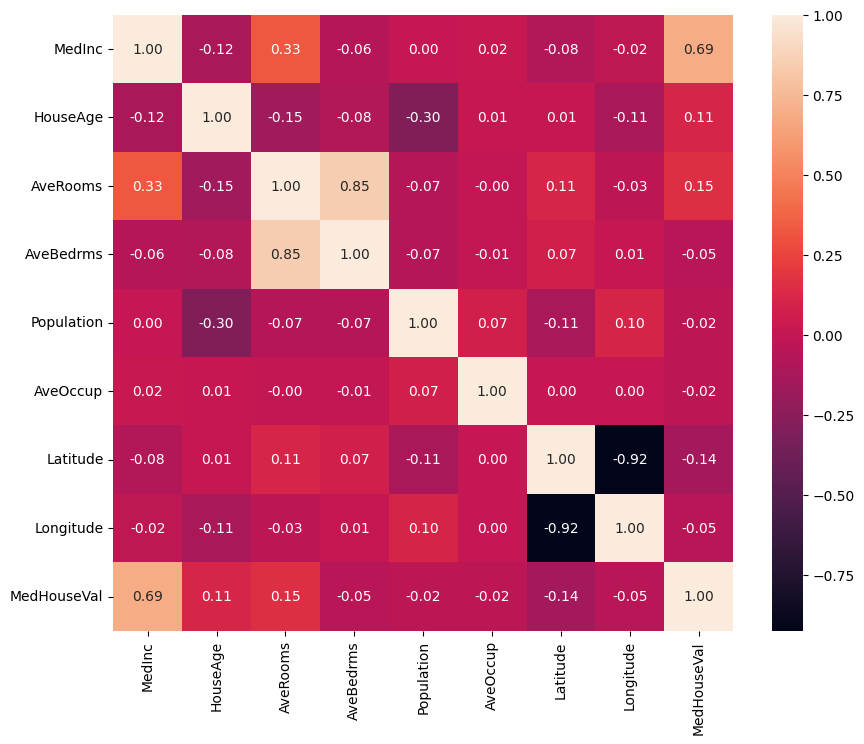

In [ ]:
corr = housingDF.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

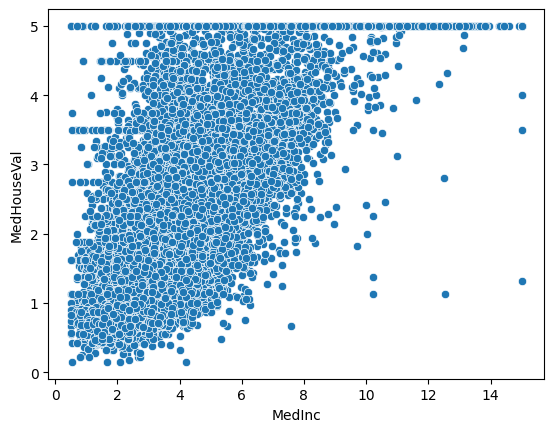

In [ ]:
# 산점도
sns.scatterplot(x="MedInc", y="MedHouseVal", data=housingDF)
plt.show()

## 1.3. 선형 회귀 모형 생성

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 타겟 변수와 설명 변수 데이터를 구분
y_target = housingDF['MedHouseVal']
X_data   = housingDF.drop('MedHouseVal', axis = 1, inplace = False)

# 선형 회귀 모형 생성
LM = LinearRegression()
LM.fit(X_data, y_target)

# 예측값 생성
y_preds = LM.predict(X_data)

# 예측값 비교
pd.DataFrame({'y_target' : y_target, 'y_preds' : y_preds})

LinearRegression()

,y_target,y_preds
0,4.526,4.131650
1,3.585,3.976606
2,3.521,3.676571
3,3.413,3.241598
4,3.422,2.413587
...,...,...
20635,0.781,0.133656
20636,0.771,0.553528
20637,0.923,0.171251
20638,0.847,0.319105


MedHouseVal = -36.9 + 0.4*MedInc + 0*HouseAge -0.1*AveRooms + 0.6*AveBedrms -0*Population -0*AveOccup -0.4*Latitude -0.4*Longitude


In [ ]:
print('intercept:', np.round(LM.intercept_, 1))
print('coefficients:', np.round(LM.coef_, 1))

intercept: -36.9
coefficients: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [ ]:
coeff = pd.Series(data = np.round(LM.coef_, 2), index = X_data.columns)
coeff

,0
MedInc,0.44
HouseAge,0.01
AveRooms,-0.11
AveBedrms,0.65
Population,-0.00
AveOccup,-0.00
Latitude,-0.42
Longitude,-0.43


# 2. 로지스틱 회귀모형 (Logistic Regression)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

## 2.1. 데이터 로드

In [ ]:
# 유방암 데이터 로드
cancer = load_breast_cancer()

# 유방암 데이터 DataFrame으로 변환
cancerDF = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [ ]:
# 유방암 데이터의 타겟 변수와 정의 (1이면 양성 종양, 0이면 악성 종양)
cancerDF['DIAG RES'] = cancer.target
# 보통 1을 주요 타겟이 되는 범주로 정의함
cancerDF['DIAG RES'] = np.where(cancerDF['DIAG RES'] == 0, 1, 0)
cancerDF.shape
cancerDF.head(10)

(569, 31)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,DIAG RES
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1


## 2.2. 데이터 시각화

<Axes: xlabel='DIAG RES', ylabel='count'>

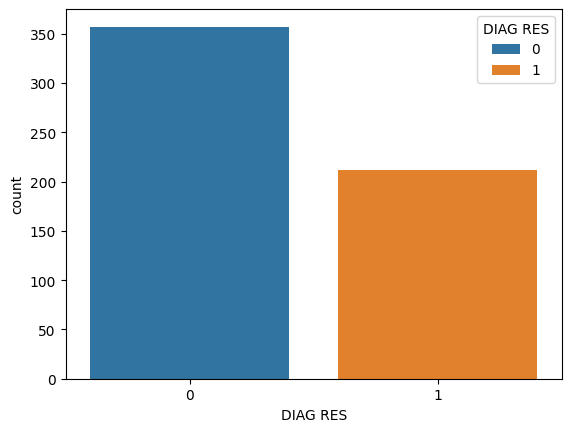

In [ ]:
# 진단 결과에 대한 분포 확인
sns.countplot(x='DIAG RES', data = cancerDF, hue="DIAG RES")

<Axes: xlabel='DIAG RES', ylabel='mean radius'>

<Axes: xlabel='DIAG RES', ylabel='mean texture'>

<Axes: xlabel='DIAG RES', ylabel='mean area'>

<Axes: xlabel='DIAG RES', ylabel='mean symmetry'>

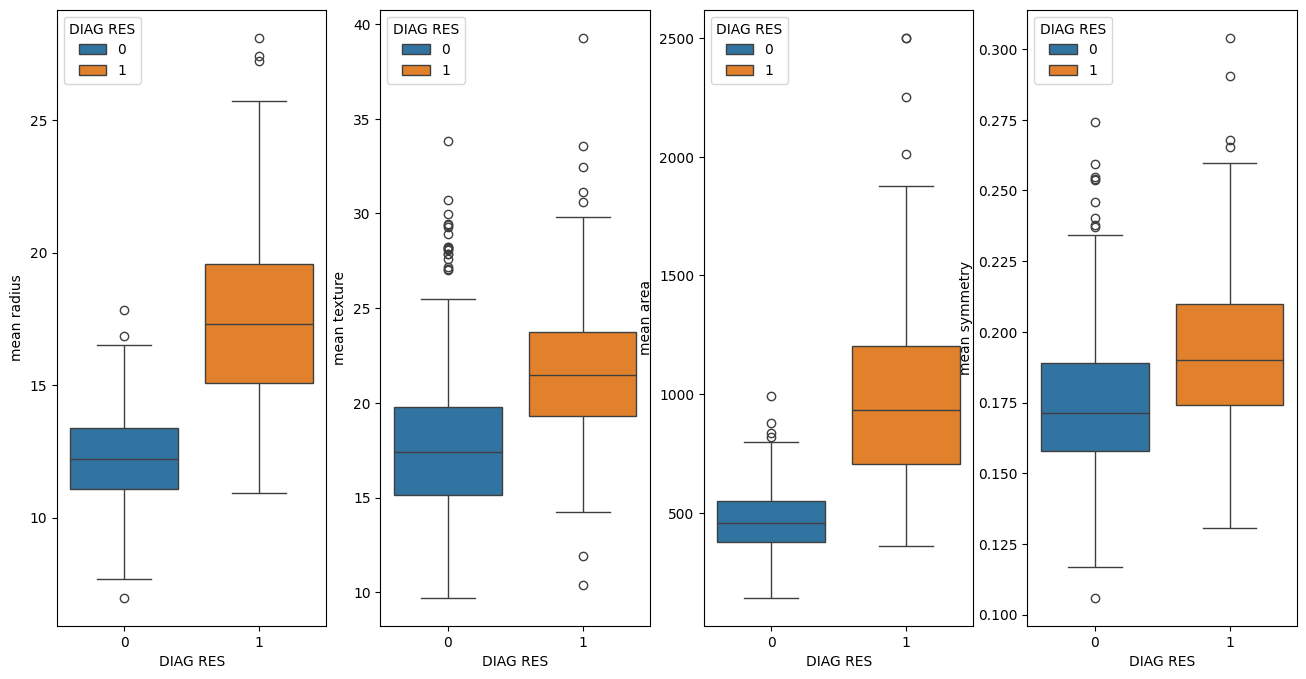

In [ ]:
# 양성 / 음성별 설명 변수의 분포 확인
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows =1)
for i, feature in enumerate(['mean radius', 'mean texture', 'mean area', 'mean symmetry']):
  sns.boxplot(x='DIAG RES', y = feature, data = cancerDF, ax = axs[i%4], hue="DIAG RES")

## 2.3. 데이터 전처리 및 로지스틱 회귀모형 생성

In [ ]:
from sklearn.linear_model import LogisticRegression

# 타겟 변수와 설명 변수 데이터를 구분
y_target = cancerDF['DIAG RES']
X_data   = cancerDF.drop(['DIAG RES'], axis = 1, inplace = False)

# 표준화 작업
scaler = StandardScaler()
scaler.fit(X_data)
X_data = pd.DataFrame(scaler.transform(X_data), columns = X_data.columns)

# 로지스틱 회귀 모형 생성
Logistic = LogisticRegression()
Logistic.fit(X_data, y_target)

StandardScaler()

LogisticRegression()

In [ ]:
# 회귀 계수 확인
column_name = ['const'] + X_data.columns.tolist()

In [ ]:
# 베타 값 추출
beta = np.concatenate([Logistic.intercept_, Logistic.coef_.reshape(-1)]).round(2)
# exp(베타) 값 추출
odds = np.exp(beta).round(2)
# beta값 비교
beta_analysis = pd.DataFrame(np.c_[beta, odds], index = column_name, columns = ['beta', 'exp(beta)'])
beta_analysis

,beta,exp(beta)
const,-0.22,0.80
mean radius,0.38,1.46
mean texture,0.38,1.46
mean perimeter,0.36,1.43
mean area,0.44,1.55
mean smoothness,0.17,1.19
mean compactness,-0.56,0.57
mean concavity,0.86,2.36
mean concave points,0.96,2.61
mean symmetry,-0.08,0.92


In [ ]:
# 예측 확률
probs = Logistic.predict_proba(X_data)[:,1]

# 타겟 변수 예측
# 타겟 변수가 1일 확률이 0.5보다 크거나 같을 경우 1로 분류하고, 작은 경우 0으로 분류함
y_preds = np.where(probs.reshape(-1) >= 0.5, 1, 0)

# 예측값 비교
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds})

,y_target,y_preds
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
564,1,1
565,1,1
566,1,1
567,1,1


In [ ]:
from sklearn.metrics import confusion_matrix
# 행 기준 : 실제값
# 열 기준 : 예측값
pd.DataFrame(confusion_matrix(y_target, y_preds))

,0,1
0,355,2
1,5,207


In [ ]:
# 타겟 변수 예측
# 타겟 변수가 1일 확률이 0.8보다 크거나 같을 경우 1로 분류하고, 작은 경우 0으로 분류함
y_preds = np.where(probs.reshape(-1) >= 0.8, 1, 0)

# 예측값 비교
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds})

# confusion matrix
# 행 기준 : 실제값
# 열 기준 : 예측값
pd.DataFrame(confusion_matrix(y_target, y_preds))

,y_target,y_preds
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
564,1,1
565,1,1
566,1,1
567,1,1


,0,1
0,357,0
1,16,196


### ***참고**

In [ ]:
import statsmodels.api as sm
model = sm.Logit(y_target, X_data)
results = model.fit(method = "newton")
results.summary()

Optimization terminated successfully.
         Current function value: 0.023921
         Iterations 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               DIAG RES   No. Observations:                  569
Model:                          Logit   Df Residuals:                      539
Method:                           MLE   Df Model:                           29
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.9638
Time:                        03:33:23   Log-Likelihood:                -13.611
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.618e-134
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
mean radius              -287.0824    202.609     -1.417      0.157    -684.188     110.023
mean texture                1.9736      3.615      0.546      0.585      -5.111       9.058
mean perimeter            155.1279    128.148      1.211      0.226     -96.038     406.294
mean area                 124.2255    103.669      1.198      0.231     -78.962     327.413
mean smoothness            17.7572     11.779      1.507      0.132      -5.330      40.844
mean compactness          -47.5162     34.946     -1.360      0.174    -116.009      20.977
mean concavity             13.5187     18.668      0.724      0.469     -23.070      50.107
mean concave points        15.7509     16.308      0.966      0.334     -16.213      47.715
mean symmetry              -7.0581      5.286     -1.335      0.182     -17.418       3.302
mean fractal dimension      3.6390      7.731      0.471      0.638     -11.513      18.791
radius error                7.5926     35.728      0.213      0.832     -62.433      77.618
texture error              -4.6785      4.637     -1.009      0.313     -13.768       4.411
perimeter error           -27.3367     22.987     -1.189      0.234     -72.390      17.716
area error                 72.9286     72.789      1.002      0.316     -69.735     215.592
smoothness error            2.0383      3.043      0.670      0.503      -3.926       8.002
compactness error          28.8732     19.253      1.500      0.134      -8.863      66.609
concavity error           -25.5843     17.553     -1.458      0.145     -59.987       8.818
concave points error       27.8933     18.893      1.476      0.140      -9.136      64.923
symmetry error             -9.8888      7.431     -1.331      0.183     -24.454       4.676
fractal dimension error   -47.2098     32.696     -1.444      0.149    -111.293      16.874
worst radius              139.3815    123.273      1.131      0.258    -102.229     380.991
worst texture              12.7728      8.213      1.555      0.120      -3.325      28.870
worst perimeter            34.3664     43.439      0.791      0.429     -50.773     119.506
worst area               -146.7785    131.877     -1.113      0.266    -405.252     111.695
worst smoothness          -10.9287     10.365     -1.054      0.292     -31.244       9.387
worst compactness         -20.7866     15.275     -1.361      0.174     -50.724       9.151
worst concavity            28.5819     19.862      1.439      0.150     -10.346      67.510
worst concave points       -5.7206      6.474     -0.884      0.377     -18.410       6.968
worst symmetry             15.6530     11.330      1.382      0.167      -6.553      37.859
worst fractal dimension    28.1211     19.643      1.432      0.152     -10.379      66.621
===========================================================================================

Possibly complete quasi-separation: A fraction 0.92 of observations can be
perfectly predicted. This might indic